# Importing all the Libraries

In [1]:
#Importing all the required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [2]:
#Reading the given dataset
df = pd.read_csv("day.csv")

#Cross checking first 5 rows
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Checking the shape of the df
df.shape

(730, 16)

So, there are a total of 730 rows and 16 columns

In [4]:
#Lets summarize the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


So as such there are no null values in the dataset which is a very good news.

In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


int64      11
float64     4
object      1
dtype: int64


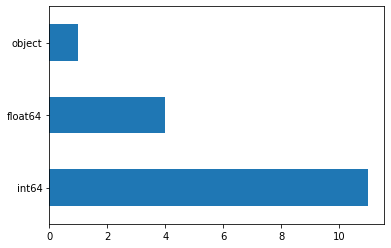

In [6]:
#Counting each type of datatype of the columns in the dataset
types = df.dtypes                      #Storing all the datatypes in a variable
print(types.value_counts())
types.value_counts().plot.barh()        #Visualization of each datatype through barplot 
plt.show()

So there are a total of 11 integer columns and based on the data dictionary some columns are actually CATEGORICAL columns whose input are in the form of binary that is 1 and 0 and some are encoded as 1 2 3 like that, so lets convert them to our required format for analysis.

In [7]:
#Checking for entire duplicate rows present in the dataset.
df.duplicated().sum()  #As the output is 0 it means that there are no two rows which are entirely identical.

0

In [8]:
#Checking the value counts for columns
for col in df.columns:
    print(df[col].value_counts())
    print("-----------------------")

730    1
251    1
249    1
248    1
247    1
      ..
485    1
484    1
483    1
482    1
1      1
Name: instant, Length: 730, dtype: int64
-----------------------
15-10-2018    1
28-05-2019    1
28-07-2018    1
11-11-2018    1
10-02-2019    1
             ..
09-05-2018    1
06-05-2018    1
28-01-2018    1
26-07-2018    1
19-05-2019    1
Name: dteday, Length: 730, dtype: int64
-----------------------
3    188
2    184
1    180
4    178
Name: season, dtype: int64
-----------------------
1    365
0    365
Name: yr, dtype: int64
-----------------------
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64
-----------------------
0    709
1     21
Name: holiday, dtype: int64
-----------------------
2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64
-----------------------
1    504
0    226
Name: workingday, dtype: int64
-----------------------
1    463
2    246
3     21
Na

# Data Cleaning

Lets change some columns to CATEGORICAL columns from int columns. These columns are season, month, weekday and weathersit.
We will also encode them differently for better understanding and readability.

In [9]:
#Changing the values of each columns appropriatly.

#Season column - Based on data dictionary
df.loc[(df['season'] == 1) , 'season'] = 'spring'       # 1=spring
df.loc[(df['season'] == 2) , 'season'] = 'summer'       # 2=summer
df.loc[(df['season'] == 3) , 'season'] = 'fall'         # 3=fall
df.loc[(df['season'] == 4) , 'season'] = 'winter'       # 4=winter

#Month column - Based on data dictionary
df[['mnth']] = df[['mnth']].apply(lambda x: x.map(
    {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'}))

#Weekday column - Based on data dictionary
df[['weekday']] = df[['weekday']].apply(lambda x: x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}))

#Weathersit column - Based on data dictionary
df.loc[(df['weathersit'] == 1) , 'weathersit'] = 'A'  # 1-Clear, Few clouds, Partly cloudy, Partly cloudy
df.loc[(df['weathersit'] == 2) , 'weathersit'] = 'B'  # 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
df.loc[(df['weathersit'] == 3) , 'weathersit'] = 'C'  # 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
df.loc[(df['weathersit'] == 4) , 'weathersit'] = 'D'  # 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [10]:
#Now changing these four columns dtype to categorical
df['season'] = df['season'].astype('category')
df['mnth'] = df['mnth'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     730 non-null    int64   
 1   dteday      730 non-null    object  
 2   season      730 non-null    category
 3   yr          730 non-null    int64   
 4   mnth        730 non-null    category
 5   holiday     730 non-null    int64   
 6   weekday     730 non-null    category
 7   workingday  730 non-null    int64   
 8   weathersit  730 non-null    category
 9   temp        730 non-null    float64 
 10  atemp       730 non-null    float64 
 11  hum         730 non-null    float64 
 12  windspeed   730 non-null    float64 
 13  casual      730 non-null    int64   
 14  registered  730 non-null    int64   
 15  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(7), object(1)
memory usage: 72.5+ KB


In [12]:
#value_counts of these columns
cat_cols = ["season", "mnth", "weekday", "weathersit"]

for i in cat_cols:
    print(df[i].value_counts())
    print("------------------")

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
------------------
Oct     62
May     62
Mar     62
Jul     62
Jan     62
Dec     62
Aug     62
Sept    60
Nov     60
Jun     60
Apr     60
Feb     56
Name: mnth, dtype: int64
------------------
Wed      105
Thurs    105
Tues     104
Sun      104
Sat      104
Mon      104
Fri      104
Name: weekday, dtype: int64
------------------
A    463
B    246
C     21
Name: weathersit, dtype: int64
------------------


Some columns are unneccessary for the analysis which are instant, dteday, casual and registered.
As 
-  instant is basically the index column which will not help in anyway for model building
-  dteday also is unneccessary as there are separated columns for month and year
-  casual and registered sum is the column cnt so these two columns can be dropped as our focus will be on the cnt column due to this correlation between them will be high as if one increase then the other is bound to increase.

In [13]:
df.drop(labels = ["instant", "dteday", "casual", "registered"], inplace = True, axis = 1)

In [14]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

# EDA

In [15]:
# Trying auto EDA based on the library mentioned in one of the class by an instructor. 
# NOTE :- But will analyse again just trying out.
#!pip install sweetviz
import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_html('sweet_report.html')

A Jupyter Widget

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Now lets proceed with our normal visualization

In [16]:
#Lets start with Visualising Numeric Variables
df["cnt"] = df["cnt"].astype("float64")
df_numeric = df.select_dtypes(include=['float64'])
df_numeric.head()

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985.0
1,14.902598,17.68695,69.6087,16.652113,801.0
2,8.050924,9.47025,43.7273,16.636703,1349.0
3,8.200000,10.60610,59.0435,10.739832,1562.0
4,9.305237,11.46350,43.6957,12.522300,1600.0


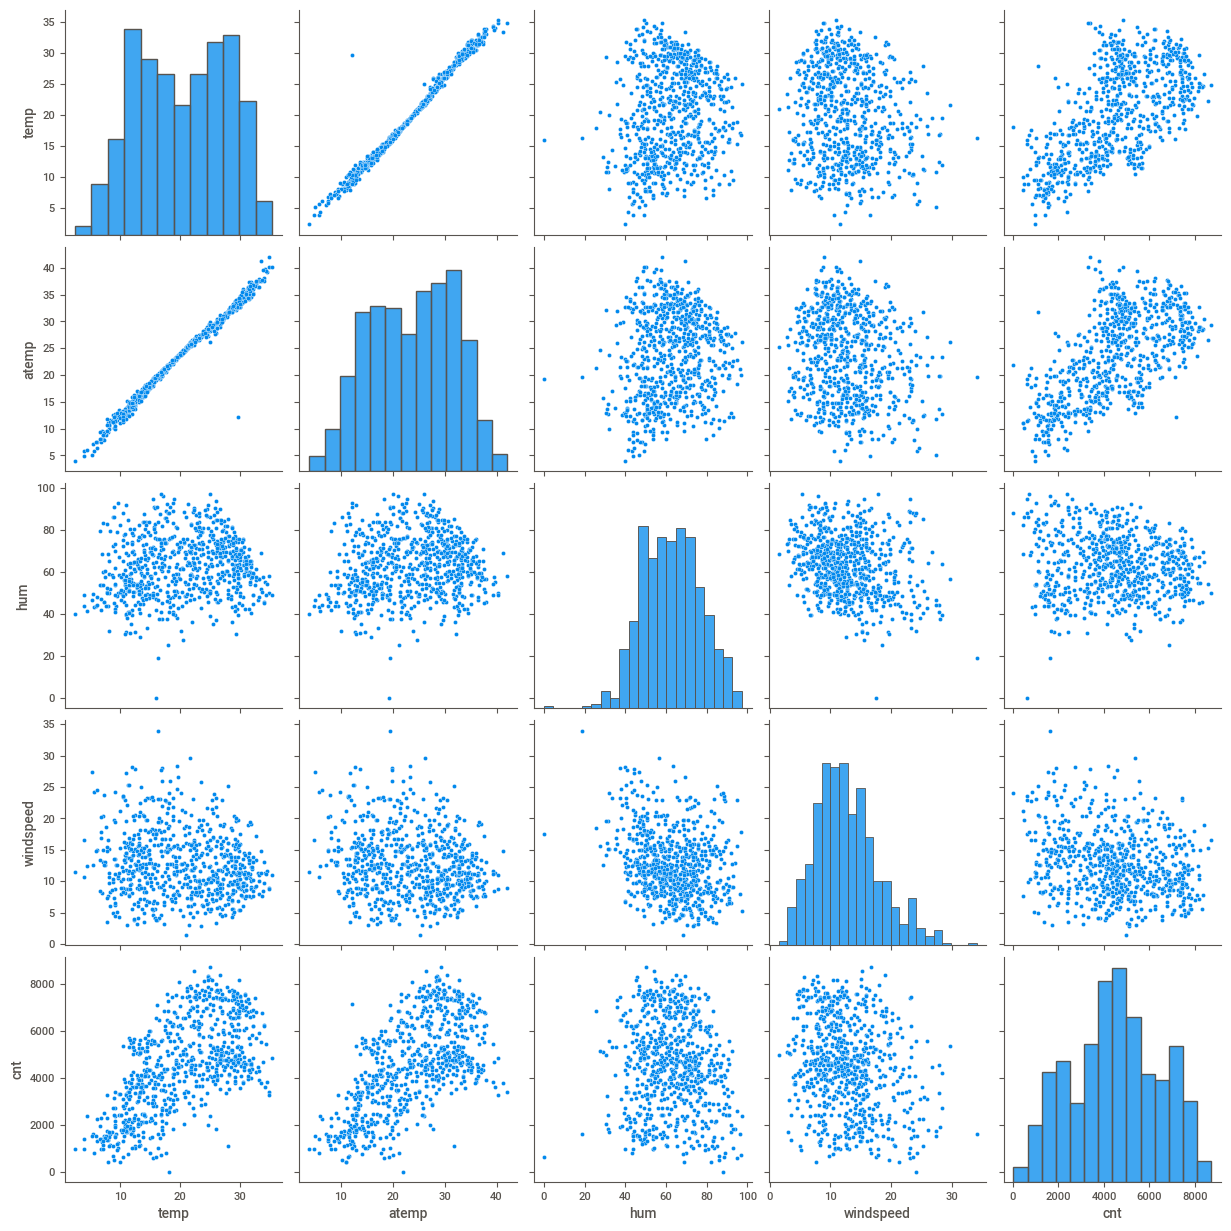

In [17]:
sns.pairplot(df_numeric)
plt.show()

In [18]:
#Correlation matrix
cor = df_numeric.corr()
cor

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


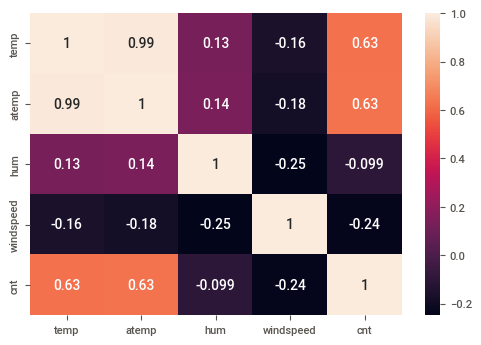

In [19]:
#Plotting heatmap for it
sns.heatmap(cor,annot=True)
plt.show()

Insights from the above heatmap:
-  The cnt is negatively correlated with 'windspeed' (approximately -0.24), which suggests that there is a slight indication that the demand for shared bikes tends to be lower on windy days in comparison to normal days. <br>
-  atemp and temp are highly positively correlated. As one can say those are dependent based on the data dictionary. So, lets drop atemp<br>
-  there is also a significant high correlation between cnt and temp and cnt and atemp.<br>


Will have to look out for Multicollinearity.

In [20]:
df.drop(labels = ["atemp"], inplace = True, axis = 1)

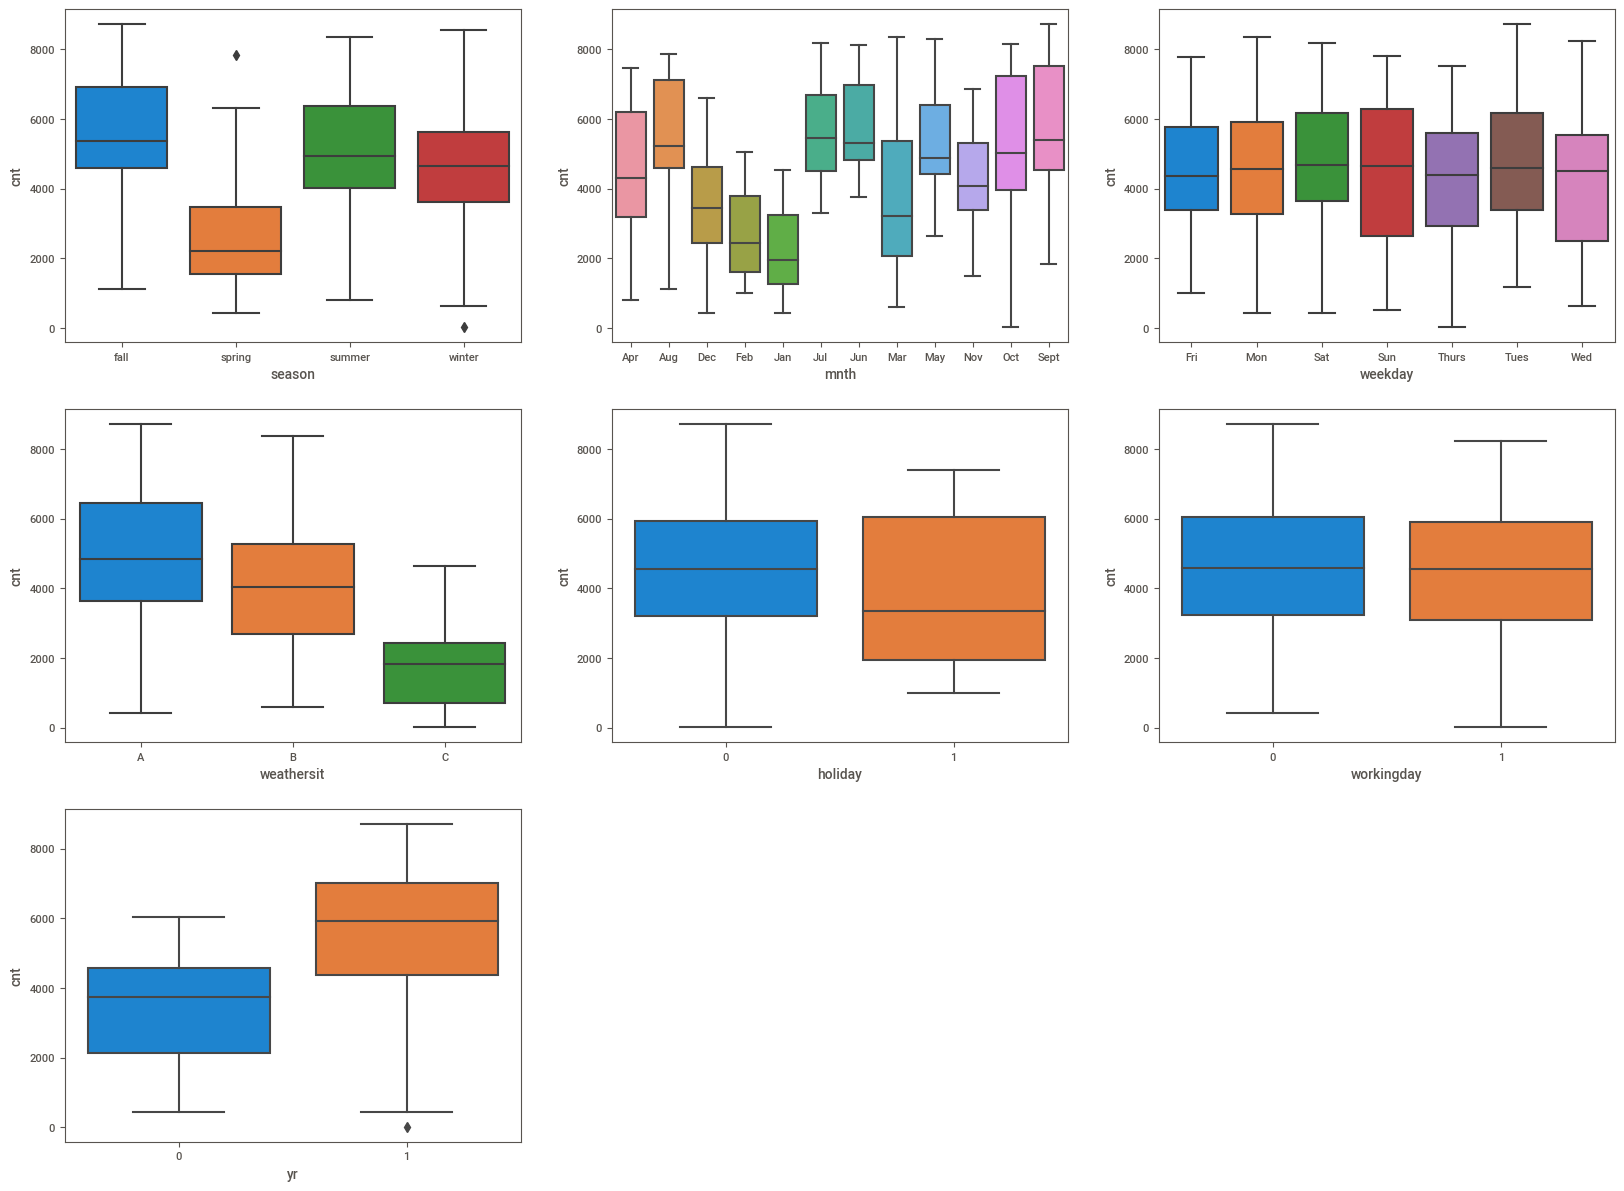

In [21]:
#Visualising Categorical Variables
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)   #this is also a categorical column based on data dictionary
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)  #this is also a categorical column based on data dictionary
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)   #As there are only two distinct entries available which are 2018 and 2019, so including in categorical
plt.show()

In [22]:
#Defining a function for analysing categorical columns.
def plot_func(df,col):
    plt.figure(figsize = (12,6))

    plt.subplot(1,2,1)
    sns.barplot(col, "cnt", data=df)
    
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data=df, hue='yr')
    plt.xticks(rotation=45)
    
    plt.show()

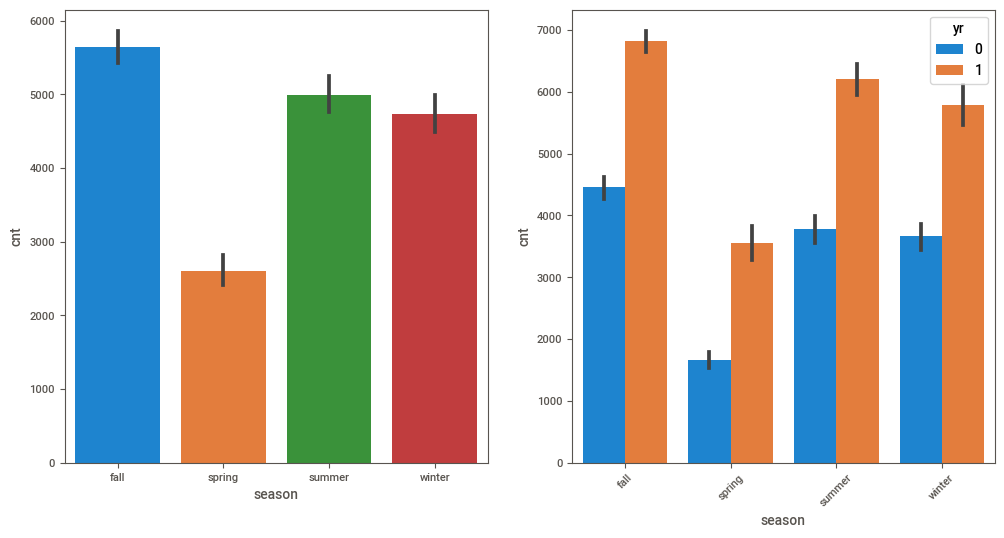

In [23]:
plot_func(df,"season")

The fall season appears to have garnered greater interest in bookings, with a significant year-over-year increase in reservations from 2018 to 2019 across all seasons.

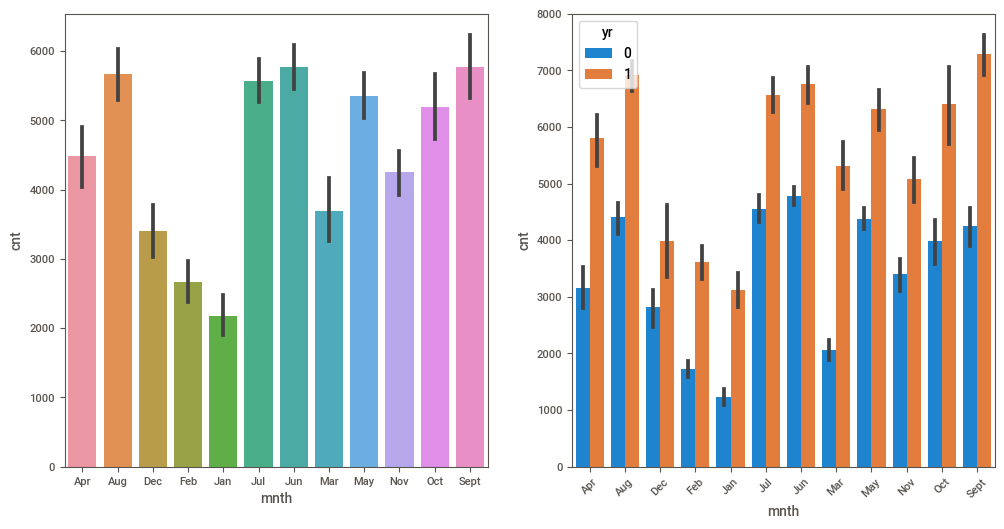

In [24]:
plot_func(df,"mnth")

The majority of bookings occurred in the months of May, June, July, August, September, and October. The trend showed a rise from the beginning of the year until the middle of the year, followed by a decline towards the end of the year. The number of bookings for each month saw an increase from 2018 to 2019.

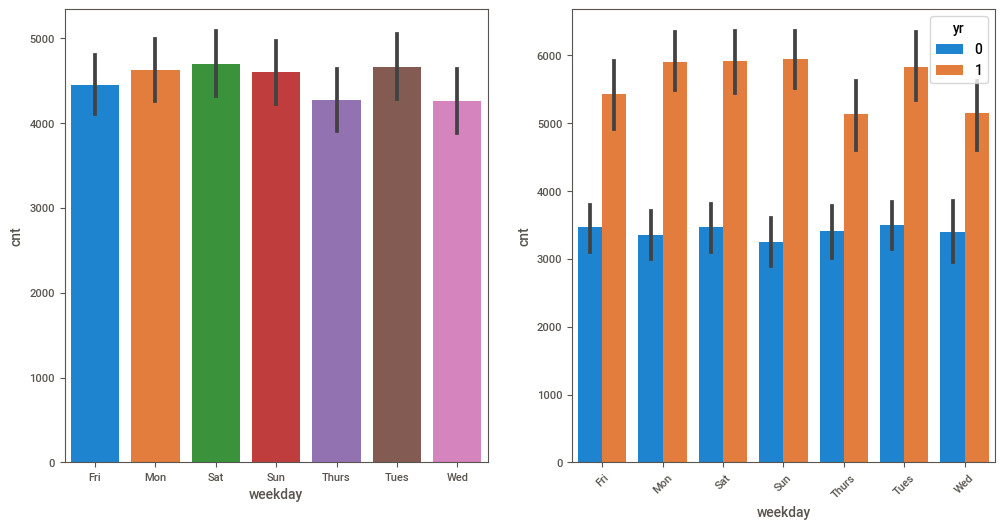

In [25]:
plot_func(df,"weekday")

Thursday, Friday, Saturday, and Sunday exhibit a higher volume of bookings compared to the other days of the week.

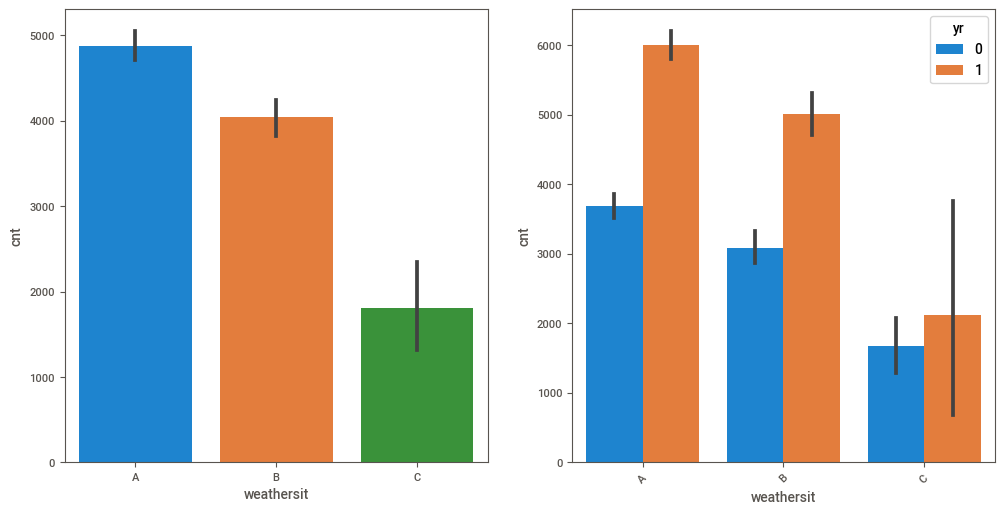

In [26]:
plot_func(df,"weathersit")

It's evident that clear weather conditions attracted more bookings, which is quite expected. Furthermore, in comparison to 2018, bookings increased for each type of weather situation in 2019.

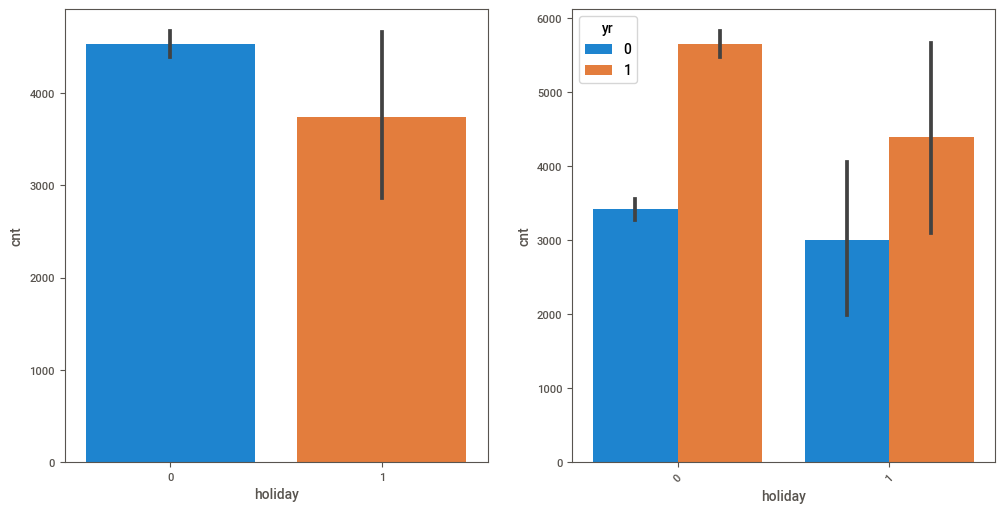

In [27]:
plot_func(df,"holiday")

When it's not a holiday, the number of bookings tends to be lower, which is a reasonable observation since people may prefer to stay at home and spend quality time with their families during holidays.

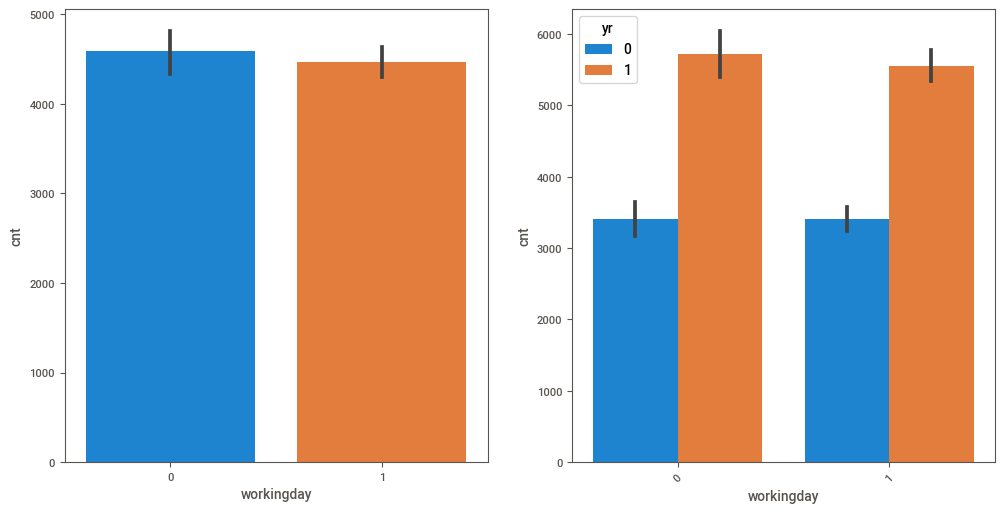

In [28]:
plot_func(df,"workingday")

Bookings appeared to be nearly equal on both working days and non-working days. However, there was an increase in the booking count from 2018 to 2019.

# Data preparation for Modelling

In [29]:
#Creating a df which contains only categorical columns
df_cate = df.select_dtypes(include=['category'])

In [30]:
#Creating dummy variables for the categorical columns
df_dummy = pd.get_dummies(df_cate, drop_first=True)
df_dummy.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [31]:
#Now dropping these categorical columns from the original dataset.
df = df.drop(list(df_cate.columns), axis=1)

In [32]:
#Then concating the dummies dataset created above to the original dataset.
df = pd.concat([df, df_dummy], axis=1)

#checking the first few rows
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,1,14.110847,80.5833,10.749882,985.0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,1,14.902598,69.6087,16.652113,801.0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


# Model Building

In [33]:
#Splitting the dataframe in the sizes of 70 and 30 respective the train and test.
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [34]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [35]:
#Some of the columns need Rescaling, so lets rescale them using MinMaxScaler
scaler = MinMaxScaler()

In [36]:
#We only need to scale only the numeric variables.
num_cols = ["temp", "hum", "windspeed", "cnt"]
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [37]:
#Cross-checking
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,0,1,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [38]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.129412,0.143137,0.147059,0.152941,0.137255,0.154902,0.345098,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.335985,0.350557,0.354512,0.360284,0.344454,0.362166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


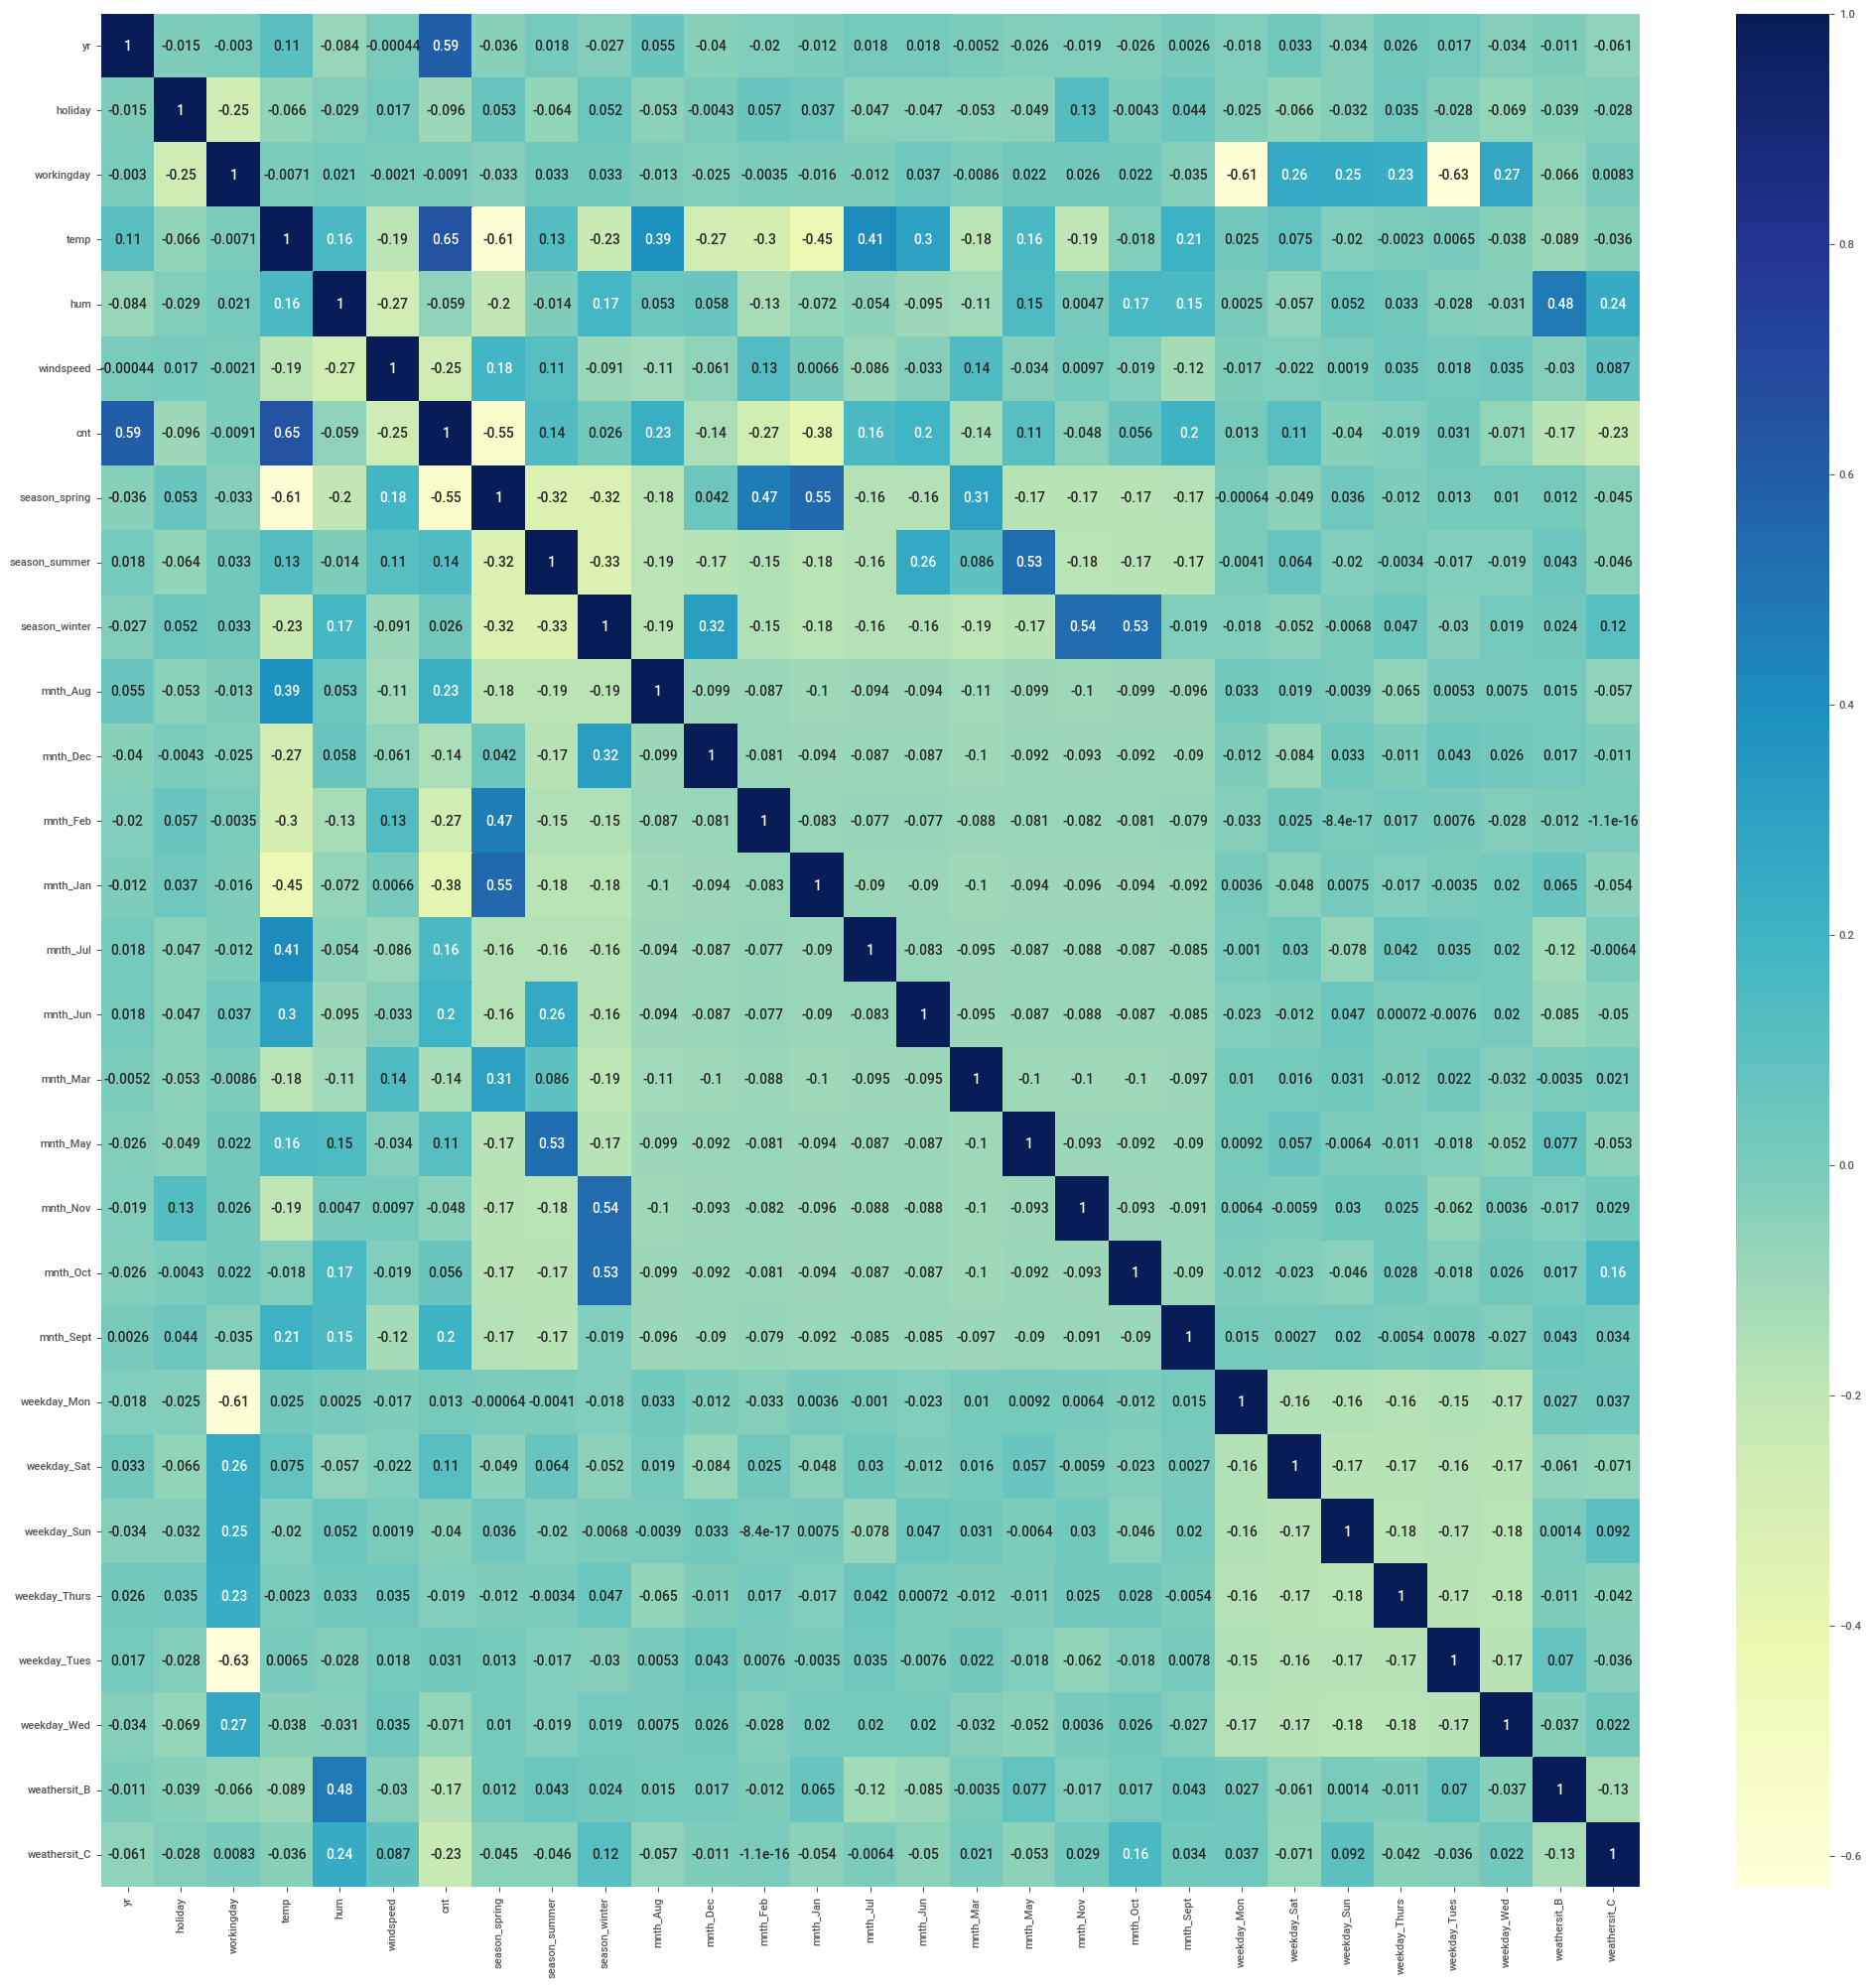

In [39]:
#Checking the correlation for finding the highly correlated variables
plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the above figure it seems that cnt have high correlation with temp followed by year. Winter also have high correlation with month octomber and november. Summer high correlation with may.

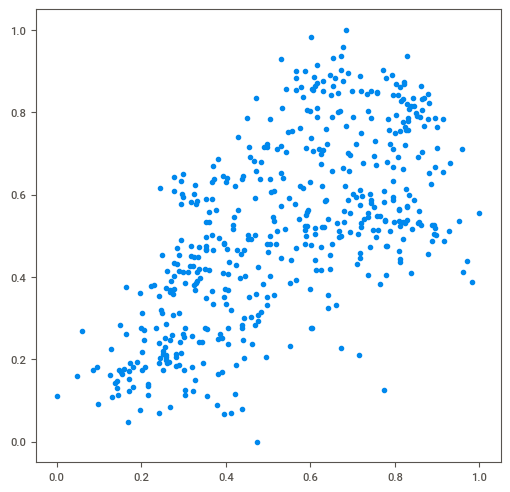

In [40]:
#Using scatterplot to visualize them.
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [41]:
#Dividing into X and y sets for linear model.
y_train = df_train.pop('cnt')
X_train = df_train

##### Building the linear model which consists all the features

In [42]:
#Adding the constant
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

In [46]:
#Checking the params
lr.params

const            0.380938
yr               0.231135
holiday         -0.134754
workingday      -0.060049
temp             0.440512
hum             -0.157355
windspeed       -0.182486
season_spring   -0.040386
season_summer    0.046443
season_winter    0.112621
mnth_Aug         0.027307
mnth_Dec        -0.044387
mnth_Feb        -0.037422
mnth_Jan        -0.064209
mnth_Jul        -0.028504
mnth_Jun         0.008393
mnth_Mar         0.000800
mnth_May         0.024732
mnth_Nov        -0.039553
mnth_Oct         0.005634
mnth_Sept        0.090823
weekday_Mon     -0.045494
weekday_Sat      0.014452
weekday_Sun      0.010225
weekday_Thurs   -0.015847
weekday_Tues    -0.039234
weekday_Wed     -0.014395
weathersit_B    -0.057848
weathersit_C    -0.249947
dtype: float64

In [47]:
#Summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.49
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          1.34e-178
Time:                        21:30:43   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     481   BIC:                            -865.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3809      0.084      4.523      0.000       0.215       0.546
yr                0.2311      0.008     28.384      0.000       0.215       0.247
holiday          -0.1348      0.065     -2.059      0.040      -0.263      -0.006
workingday       -0.0600      0.071     -0.844      0.399      -0.200       0.080
temp              0.4405      0.047      9.412      0.000       0.349       0.532
hum              -0.1574      0.039     -4.043      0.000      -0.234      -0.081
windspeed        -0.1825      0.026     -7.003      0.000      -0.234      -0.131
season_spring    -0.0404      0.030     -1.335      0.182      -0.100       0.019
season_summer     0.0464      0.026      1.761      0.079      -0.005       0.098
season_winter     0.1126      0.028      3.994      0.000       0.057       0.168
mnth_Aug          0.0273      0.034      0.806      0.421      -0.039       0.094
mnth_Dec         -0.0444      0.034     -1.309      0.191      -0.111       0.022
mnth_Feb         -0.0374      0.033     -1.123      0.262      -0.103       0.028
mnth_Jan         -0.0642      0.034     -1.894      0.059      -0.131       0.002
mnth_Jul         -0.0285      0.035     -0.808      0.420      -0.098       0.041
mnth_Jun          0.0084      0.025      0.336      0.737      -0.041       0.058
mnth_Mar          0.0008      0.025      0.032      0.974      -0.048       0.050
mnth_May          0.0247      0.021      1.164      0.245      -0.017       0.066
mnth_Nov         -0.0396      0.037     -1.077      0.282      -0.112       0.033
mnth_Oct          0.0056      0.036      0.156      0.876      -0.066       0.077
mnth_Sept         0.0908      0.032      2.822      0.005       0.028       0.154
weekday_Mon      -0.0455      0.071     -0.642      0.521      -0.185       0.094
weekday_Sat       0.0145      0.015      0.936      0.349      -0.016       0.045
weekday_Sun       0.0102      0.015      0.669      0.504      -0.020       0.040
weekday_Thurs    -0.0158      0.015     -1.056      0.291      -0.045       0.014
weekday_Tues     -0.0392      0.071     -0.554      0.580      -0.178       0.100
weekday_Wed      -0.0144      0.015     -0.952      0.341      -0.044       0.015
weathersit_B     -0.0578      0.011     -5.495      0.000      -0.079      -0.037
weathersit_C     -0.2499      0.027     -9.380      0.000      -0.302      -0.198
==============================================================================
Omnibus:                       78.047   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.442
Skew:                          -0.762   Prob(JB):                     2.45e-45
Kurtosis:                       5.710   Cond. No.                         70.0
================================================================

In [48]:
#Creating a function for checking VIF
def VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [49]:
#Checking VIF
print(VIF(X_train))

         Features    VIF
2      workingday  64.68
3            temp  43.92
4             hum  41.18
6   season_spring  13.48
8   season_winter  12.38
24   weekday_Tues  12.32
20    weekday_Mon  11.82
7   season_summer   9.79
17       mnth_Nov   7.17
18       mnth_Oct   6.81
9        mnth_Aug   6.77
12       mnth_Jan   6.08
13       mnth_Jul   5.89
10       mnth_Dec   5.78
5       windspeed   5.60
19      mnth_Sept   5.02
11       mnth_Feb   4.49
15       mnth_Mar   3.72
14       mnth_Jun   3.04
1         holiday   2.71
16       mnth_May   2.43
26   weathersit_B   2.43
25    weekday_Wed   2.26
23  weekday_Thurs   2.20
22    weekday_Sun   2.19
21    weekday_Sat   2.18
0              yr   2.13
27   weathersit_C   1.33


In [50]:
#Model-2
#As the column mnth_march has too high p-value lets drop it and train again.
X = X_train.drop('mnth_Mar', 1,)

X_train_lm = sm.add_constant(X)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

#Printing summary
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.3
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          1.32e-179
Time:                        21:30:50   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     482   BIC:                            -871.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3814      0.083      4.610

So, even after dropping the mnth_march R-aquared didnt change so it was a redundant variable.

In [51]:
# Calculate the VIFs again for the new model
VIF(X)

,Features,VIF
2,workingday,58.52
3,temp,43.25
4,hum,40.57
8,season_winter,11.82
6,season_spring,11.54
23,weekday_Tues,11.09
19,weekday_Mon,10.70
7,season_summer,9.59
9,mnth_Aug,6.13
5,windspeed,5.60


In [52]:
#Model-3
#As the column mnth_Oct has too high p-value lets drop it and train again.
X = X.drop('mnth_Oct', 1,)

X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

#Printing summary
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.4
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          1.29e-180
Time:                        21:30:52   Log-Likelihood:                 522.97
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     483   BIC:                            -877.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3830      0.082      4.665

In [53]:
# Calculate the VIFs again for the new model
VIF(X)

,Features,VIF
2,workingday,57.26
3,temp,42.88
4,hum,39.93
6,season_spring,11.17
22,weekday_Tues,10.86
18,weekday_Mon,10.46
8,season_winter,8.93
7,season_summer,8.30
5,windspeed,5.58
9,mnth_Aug,5.26


In [54]:
#Model-4
#As the column mnth_Jun has too high p-value lets drop it and train again.
X = X.drop('mnth_Jun', 1,)

X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

#Printing summary
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.8
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          1.28e-181
Time:                        21:30:54   Log-Likelihood:                 522.92
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     484   BIC:                            -883.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3828      0.082      4.667

In [55]:
# Calculate the VIFs again for the new model
VIF(X)

,Features,VIF
2,workingday,57.03
4,hum,39.09
3,temp,29.85
21,weekday_Tues,10.82
17,weekday_Mon,10.44
6,season_spring,10.24
7,season_summer,8.03
8,season_winter,7.79
5,windspeed,5.51
9,mnth_Aug,3.44


In [56]:
#Model-5
#As the column weekday_Tues has too high p-value lets drop it and train again.
X = X.drop('weekday_Tues', 1,)

X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

#Printing summary
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.6
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          1.37e-182
Time:                        21:30:55   Log-Likelihood:                 522.76
No. Observations:                 510   AIC:                            -995.5
Df Residuals:                     485   BIC:                            -889.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3436      0.041      8.435

In [57]:
# Calculate the VIFs again for the new model
VIF(X)

,Features,VIF
4,hum,34.33
3,temp,21.85
2,workingday,10.58
6,season_spring,7.37
8,season_winter,6.01
7,season_summer,5.89
5,windspeed,4.96
9,mnth_Aug,3.15
13,mnth_Jul,2.81
12,mnth_Jan,2.42


In [58]:
#Model-6
#As the column weekday_Mon has too high p-value lets drop it and train again.
X = X.drop('weekday_Mon', 1,)

X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [59]:
#Printing summary
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.7
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          1.38e-183
Time:                        21:31:01   Log-Likelihood:                 522.65
No. Observations:                 510   AIC:                            -997.3
Df Residuals:                     486   BIC:                            -895.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3405      0.040      8.482

In [60]:
# Calculate the VIFs again for the new model
VIF(X)

,Features,VIF
4,hum,34.12
3,temp,21.39
2,workingday,8.33
6,season_spring,7.17
8,season_winter,5.92
7,season_summer,5.76
5,windspeed,4.95
9,mnth_Aug,3.13
13,mnth_Jul,2.80
12,mnth_Jan,2.41


In [61]:
#Model-7
#As the column weekday_Sun has too high p-value lets drop it and train again.
X = X.drop('weekday_Sun', 1,)

X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

#Printing summary
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.3
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          1.56e-184
Time:                        21:31:03   Log-Likelihood:                 522.39
No. Observations:                 510   AIC:                            -998.8
Df Residuals:                     487   BIC:                            -901.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3397      0.040      8.469

In [62]:
# Calculate the VIFs again for the new model
VIF(X)

,Features,VIF
4,hum,34.12
3,temp,21.34
6,season_spring,7.17
8,season_winter,5.87
7,season_summer,5.74
2,workingday,5.34
5,windspeed,4.95
9,mnth_Aug,3.11
13,mnth_Jul,2.79
12,mnth_Jan,2.41


In [63]:
#Model-8
#As the column weekday_Sat has too high p-value lets drop it and train again.
X = X.drop('weekday_Sat', 1,)

X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

#Printing summary
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.4
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          1.69e-185
Time:                        21:31:04   Log-Likelihood:                 522.14
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     488   BIC:                            -907.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3398      0.040      8.477

In [64]:
# Calculate the VIFs again for the new model
VIF(X)

,Features,VIF
4,hum,34.10
3,temp,21.34
6,season_spring,7.17
8,season_winter,5.87
7,season_summer,5.74
5,windspeed,4.95
2,workingday,4.41
9,mnth_Aug,3.11
13,mnth_Jul,2.78
12,mnth_Jan,2.41


In [65]:
#Model-9
#As the column mnth_Aug has too high p-value lets drop it and train again.
X = X.drop('mnth_Aug', 1,)

X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

#Printing summary
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     138.0
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          1.92e-186
Time:                        21:31:05   Log-Likelihood:                 521.83
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     489   BIC:                            -912.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3502      0.038      9.275

In [66]:
# Calculate the VIFs again for the new model
VIF(X)

,Features,VIF
4,hum,32.50
3,temp,18.63
6,season_spring,5.48
5,windspeed,4.88
2,workingday,4.41
8,season_winter,4.11
7,season_summer,3.38
11,mnth_Jan,2.39
18,weathersit_B,2.37
0,yr,2.11


In [67]:
#Model-10
#As the column workingday has too high p-value lets drop it and train again.
X = X.drop('workingday', 1,)

X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

#Printing summary
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.3
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          2.45e-187
Time:                        21:31:06   Log-Likelihood:                 521.36
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     490   BIC:                            -918.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3449      0.037      9.238

In [68]:
# Calculate the VIFs again for the new model
VIF(X)

,Features,VIF
3,hum,31.84
2,temp,18.41
5,season_spring,5.45
4,windspeed,4.87
7,season_winter,4.08
6,season_summer,3.35
10,mnth_Jan,2.38
17,weathersit_B,2.34
0,yr,2.11
9,mnth_Feb,1.92


In [69]:
#Model-11
#As the column mnth_May has too high p-value lets drop it and train again.
X = X.drop('mnth_May', 1,)

X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

#Printing summary
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.2
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          3.77e-188
Time:                        21:31:08   Log-Likelihood:                 520.67
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     491   BIC:                            -922.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3360      0.037      9.195

In [70]:
# Calculate the VIFs again for the new model
VIF(X)

,Features,VIF
3,hum,31.80
2,temp,18.36
5,season_spring,5.45
4,windspeed,4.78
7,season_winter,4.08
6,season_summer,2.82
10,mnth_Jan,2.38
16,weathersit_B,2.34
0,yr,2.10
9,mnth_Feb,1.92


In [71]:
#Model-12
#As the column mnth_Feb has high p-value lets drop it and train again.
X = X.drop('mnth_Feb', 1,)

X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

#Printing summary
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.4
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          1.21e-188
Time:                        21:31:09   Log-Likelihood:                 519.18
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     492   BIC:                            -926.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3239      0.036      9.021

In [72]:
# Calculate the VIFs again for the new model
VIF(X)

,Features,VIF
3,hum,31.17
2,temp,17.82
4,windspeed,4.77
5,season_spring,4.37
7,season_winter,4.08
6,season_summer,2.82
15,weathersit_B,2.33
0,yr,2.09
11,mnth_Nov,1.85
9,mnth_Jan,1.75


Now, notice all features has p-value < 0.05, means that now all the features are significant but coming to VIF, we do find some variables having very high VIF values so lets try and remove them one by one.

In [73]:
#Model-13
X = X.drop('hum', 1,)

X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

#Printing summary
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.1
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          3.68e-186
Time:                        21:31:12   Log-Likelihood:                 510.55
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     493   BIC:                            -915.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2530      0.032      7.904

In [74]:
VIF(X)

,Features,VIF
2,temp,5.23
3,windspeed,4.70
6,season_winter,3.00
4,season_spring,2.92
5,season_summer,2.26
0,yr,2.08
10,mnth_Nov,1.81
8,mnth_Jan,1.66
9,mnth_Jul,1.60
14,weathersit_B,1.57


In [75]:
#Model-14
X = X.drop('season_winter', 1,)

X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()

#Printing summary
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     166.2
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          6.37e-182
Time:                        21:31:13   Log-Likelihood:                 497.72
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     494   BIC:                            -895.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3538      0.026     13.816

In [76]:
VIF(X)

,Features,VIF
2,temp,5.09
3,windspeed,4.50
4,season_spring,2.49
0,yr,2.06
5,season_summer,1.94
7,mnth_Jan,1.64
13,weathersit_B,1.54
8,mnth_Jul,1.50
10,mnth_Sept,1.34
9,mnth_Nov,1.27


In [77]:
#Model-15
#As the column season_spring has high vif value lets drop it and train again.
X = X.drop('season_spring', 1,)

X_train_lm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm).fit()

#Printing summary
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     149.5
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          1.65e-167
Time:                        21:31:14   Log-Likelihood:                 460.64
No. Observations:                 510   AIC:                            -891.3
Df Residuals:                     495   BIC:                            -827.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2212      0.022      9.949

In [78]:
VIF(X)

,Features,VIF
2,temp,5.04
3,windspeed,3.51
0,yr,2.04
4,season_summer,1.72
12,weathersit_B,1.53
7,mnth_Jul,1.47
9,mnth_Sept,1.31
6,mnth_Jan,1.22
10,weekday_Thurs,1.22
11,weekday_Wed,1.22


In [79]:
#Model-16
#column mnth_Dec has gained high p-value so lets drop it and train again.
X = X.drop('mnth_Dec', 1,)

X_train_lm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_lm).fit()

#Printing summary
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     161.0
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          1.77e-168
Time:                        21:31:15   Log-Likelihood:                 460.30
No. Observations:                 510   AIC:                            -892.6
Df Residuals:                     496   BIC:                            -833.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2296      0.020     11.655

In [80]:
VIF(X)

,Features,VIF
2,temp,5.04
3,windspeed,3.43
0,yr,2.03
4,season_summer,1.65
11,weathersit_B,1.51
6,mnth_Jul,1.46
8,mnth_Sept,1.30
9,weekday_Thurs,1.22
10,weekday_Wed,1.21
5,mnth_Jan,1.20


In [81]:
#Model-17
#column weekday_Wed has gained high p-value so lets drop it and train again.
X = X.drop('weekday_Wed', 1,)

X_train_lm = sm.add_constant(X)

lr_16 = sm.OLS(y_train, X_train_lm).fit()

#Printing summary
print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     173.4
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          6.38e-169
Time:                        21:31:17   Log-Likelihood:                 458.67
No. Observations:                 510   AIC:                            -891.3
Df Residuals:                     497   BIC:                            -836.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2247      0.020     11.493

In [82]:
VIF(X)

,Features,VIF
2,temp,4.98
3,windspeed,3.36
0,yr,2.03
4,season_summer,1.65
10,weathersit_B,1.51
6,mnth_Jul,1.46
8,mnth_Sept,1.30
5,mnth_Jan,1.19
9,weekday_Thurs,1.18
7,mnth_Nov,1.17


In [83]:
#Model-18
#column weekday_Thurs has gained high p-value so lets drop it and train again.
X = X.drop('weekday_Thurs', 1,)

X_train_lm = sm.add_constant(X)

lr_17 = sm.OLS(y_train, X_train_lm).fit()

#Printing summary
print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     188.2
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          1.88e-169
Time:                        21:31:19   Log-Likelihood:                 457.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     498   BIC:                            -839.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2217      0.020     11.367

In [84]:
VIF(X)

,Features,VIF
2,temp,4.95
3,windspeed,3.32
0,yr,2.03
4,season_summer,1.65
9,weathersit_B,1.51
6,mnth_Jul,1.46
8,mnth_Sept,1.30
5,mnth_Jan,1.19
7,mnth_Nov,1.17
10,weathersit_C,1.06


##### So, we started with 28 features for which the R-Squared was 0.850 and Adj. R-Squared was 0.841. 
##### From there we reduced it to 11 features, that is removing all the features which had either high p-value and high vif value or high vif and less pvalue or high p-value and less vif value. 
##### Now, for these 11 features we have R-Squared and Adj. R-Squared as 0.860 and 0.803 respectively.
##### This tells us that the model is most of the variance with just 11 features without being too complex.
##### So, let us proceed with this model.

### Residual analysis

In [85]:
X_train_lm

,const,yr,holiday,temp,windspeed,season_summer,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sept,weathersit_B,weathersit_C
576,1.0,1,0,0.815169,0.264686,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,1,0,0,0,0,1,0
111,1.0,0,0,0.345824,0.380981,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0,0,0,1,0
79,1.0,0,0,0.462664,0.529881,1,0,0,0,0,1,0


In [86]:
y_train_pred = lr_17.predict(X_train_lm)

#### Normality of Error terms

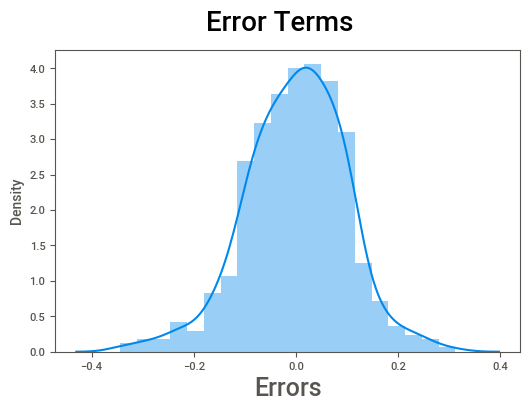

In [87]:
#Checking if the error terms are also normally distributed
#Plotting the histogram of the error terms
sns.distplot((y_train - y_train_pred), bins = 20)
plt.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

#### Multicollinearity

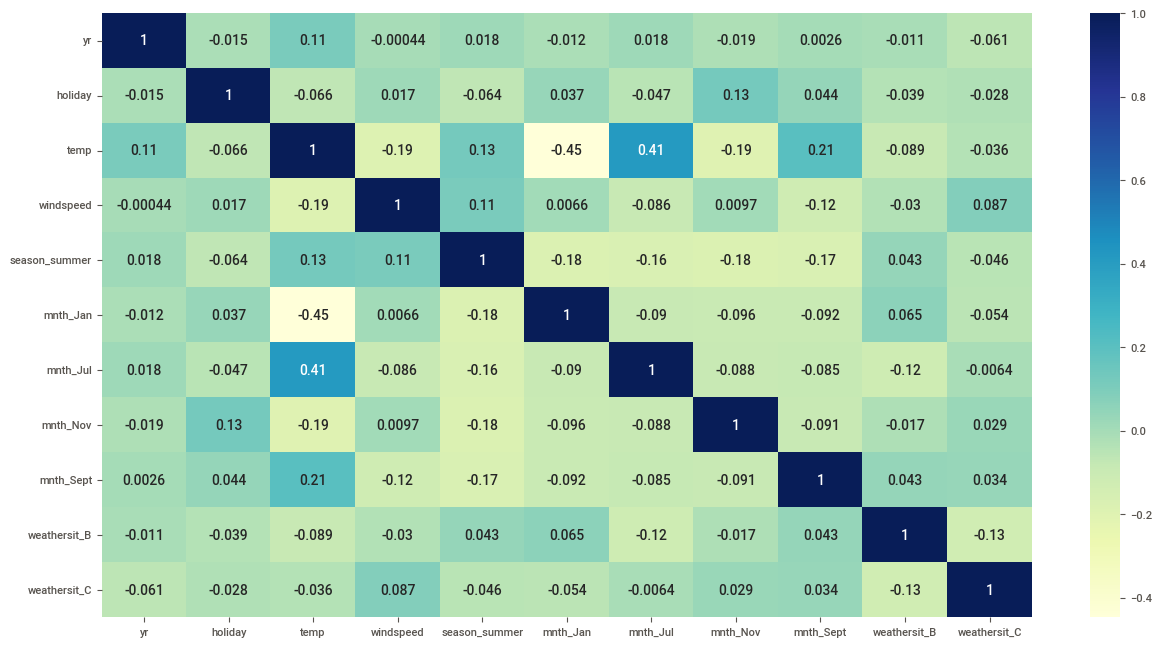

In [88]:
#Checking for multicollinearity
plt.figure(figsize=(15,8))
sns.heatmap(X.corr(),annot = True, cmap="YlGnBu")
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

#### Checking for Homoscedasticity

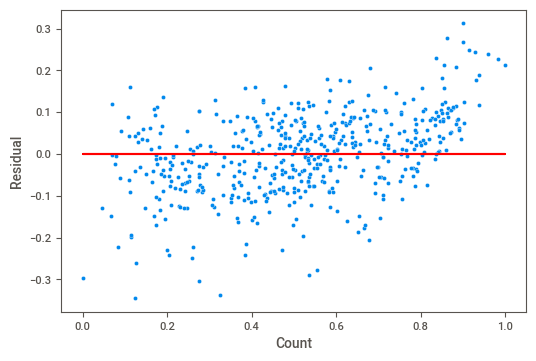

In [89]:
#Homoscedasticity
y_train_pred = lr_17.predict(X_train_lm)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

There are no visible patterns as such that can be observed from above plot for residuals.

And as the Durbin-Watson value for the final model is 2.103 which is close to 2 implies there is not much autocorrelation.

### Making predictions

In [90]:
#Scaling in test dataset
df_test[num_cols] = scaler.transform(df_test[num_cols])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,1,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [91]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.172727,0.140909,0.131818,0.122727,0.154545,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.378873,0.348721,0.339064,0.328872,0.362295,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
#Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [93]:
#Making the test dataset to contain the columns present in the training dataset
col1 = X.columns
col1

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_summer', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sept', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [94]:
X_test = X_test[col1]
X_test

,yr,holiday,temp,windspeed,season_summer,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sept,weathersit_B,weathersit_C
184,0,1,0.831783,0.084219,0,0,1,0,0,1,0
535,1,0,0.901354,0.153728,1,0,0,0,0,0,0
299,0,0,0.511964,0.334206,0,0,0,0,0,1,0
221,0,0,0.881625,0.339570,0,0,0,0,0,0,0
152,0,0,0.817246,0.537414,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,0.519232,0.283397,0,0,0,0,0,0,0
127,0,0,0.584649,0.069510,1,0,0,0,0,0,0
640,1,0,0.745598,0.052115,0,0,0,0,0,1,0
72,0,0,0.331557,0.203418,0,0,0,0,0,0,0


In [95]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

In [96]:
#Making predictions
y_pred = lr_17.predict(X_test_lm)

In [97]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7404

### Model Evaluation

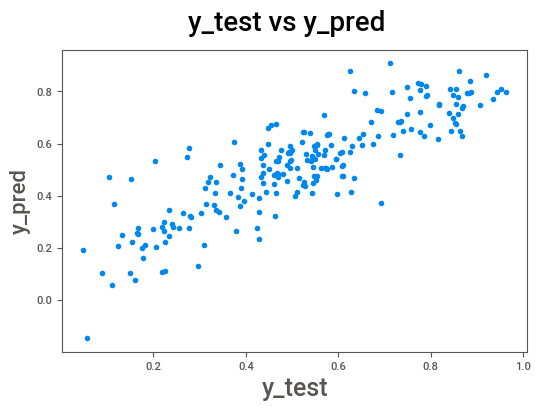

In [98]:
# Plotting y_test and y_pred to understand the spread

plt.scatter(y_test, y_pred)
plt.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   
plt.show()

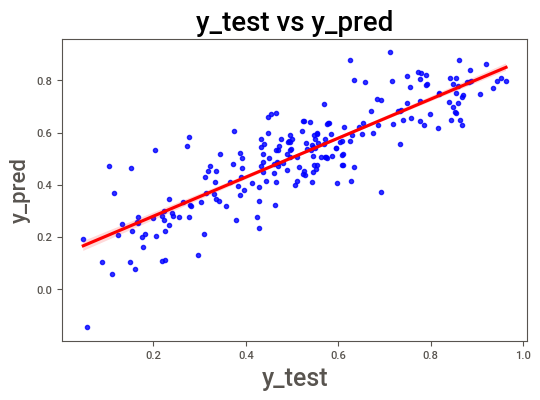

In [99]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [100]:
round(lr_17.params,4)

const            0.2217
yr               0.2344
holiday         -0.1028
temp             0.4924
windspeed       -0.1971
season_summer    0.0378
mnth_Jan        -0.0988
mnth_Jul        -0.0642
mnth_Nov         0.0599
mnth_Sept        0.0802
weathersit_B    -0.0746
weathersit_C    -0.2593
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.4924 \times  temp - 0.1971  \times  windspeed + 0.2344 \times yr + 0.0378 \times season_summer - 0.0746 \times weathersit_B - 0.0642 \times mnth_Jul + 0.0802 \times mnth_Sept - 0.0988 \times mnth_Jan + 0.0599 \times mnth_Nov - 0.2593 \times weathersit_C - 0.1028 \times holiday $